In [95]:
# Jodie Sun, HW 05
# Observations: 
# Capomulin shows positive effects -- as the time point passes, the size/volume of the tumor seems to be smaller
# Overrall when the mouse's weight increases, the size/volume of the tumor gets bigger too
# By looking at the number of mice tested at each timepoint for each treatment,we see some of the drugs showing a significant drop in the number of mice. It could be some of the treatments were not working well so many mice died :( ...
# This experiment is spread out evenly among Sex, (930 Females and 958 Males mouses)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
mouse_metadata_path = "./Mouse_metadata.csv"
study_results_path = "./Study_results.csv"

In [96]:
# Read data
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [97]:
# combine the data into a single dataset
merged_df = pd.merge(mouse_metadata,study_results, on = "Mouse ID", how="outer")
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [98]:
# check the data length before dropping the duplicates
print(len(merged_df["Mouse ID"]))
print(len(merged_df["Mouse ID"].value_counts()))

1893
249


In [99]:
# check duplicates
duplicated_df = merged_df[merged_df.duplicated(subset = ['Mouse ID','Timepoint'],keep = False)]
duplicated_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [100]:
# get clean data
cleaned_df = merged_df.drop_duplicates(['Mouse ID','Timepoint'],keep = 'last')
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [101]:
# check the length again after clean data
print(len(cleaned_df["Mouse ID"]))
print(len(cleaned_df["Mouse ID"].value_counts()))

1888
249


In [9]:
# check the names of all the drugs 
cleaned_df["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [10]:
# make a summary statistics table
summary_df = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([('mean',np.mean),('median',np.median),
                                                                          ('variance',np.var),('standard deviation',np.std),
                                                                          ('SEM',st.sem)])
summary_df

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


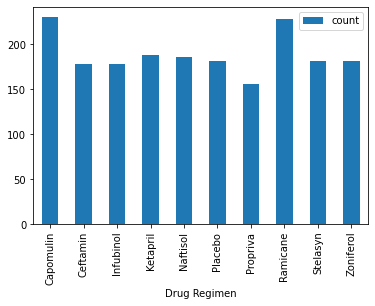

In [77]:
# plot of numbers of mice tested on each drug (Pandas)
bar_drug_df = cleaned_df.groupby("Drug Regimen")["Mouse ID"].agg([('count',np.count_nonzero)])
bar_drug_df.plot.bar()
plt.show()

In [179]:
# Now use plt to make the same plot

In [176]:
drug_ls = sorted(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'])
mice_count = bar_drug_df["count"]

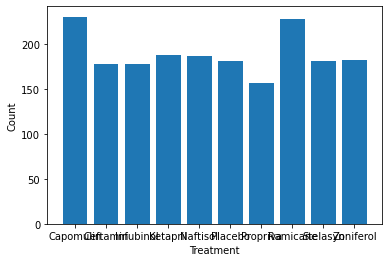

In [178]:
plt.bar(drug_ls,mice_count)
plt.xlabel("Treatment")
plt.ylabel("Count")
plt.show()

In [ ]:
# try a for loop to run each treatment regimen on each time point: 

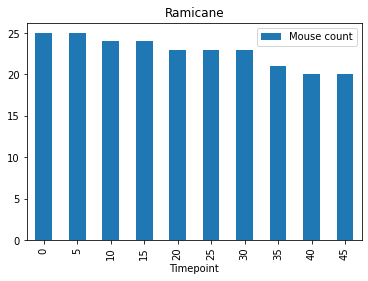

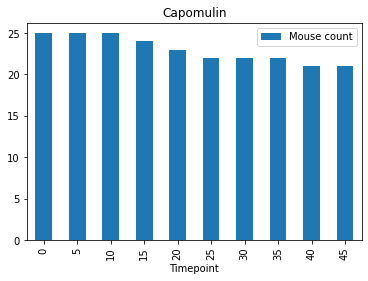

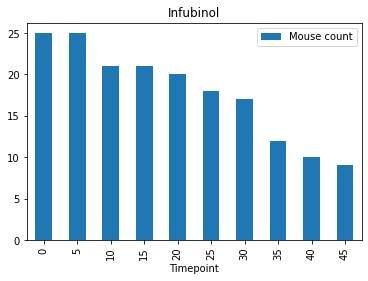

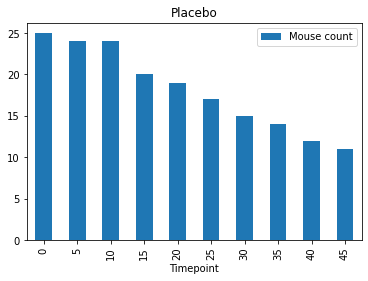

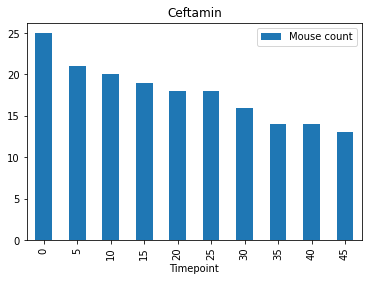

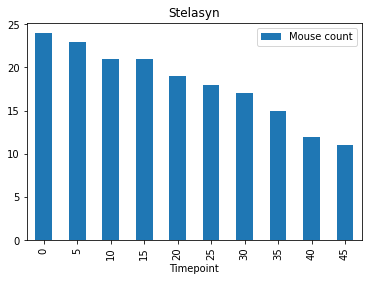

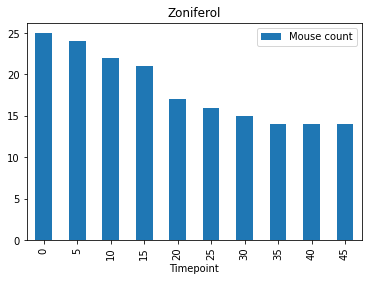

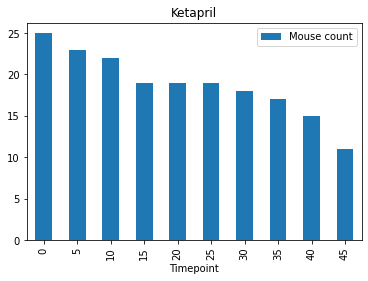

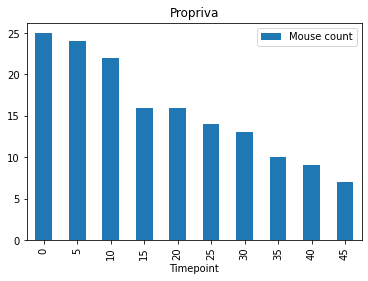

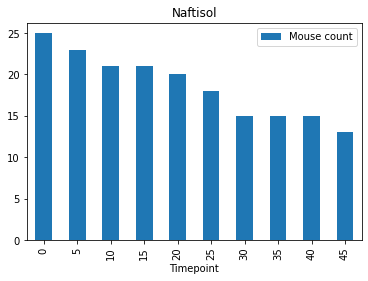

In [180]:
#try for loop: 
drug_ls2 = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
for drug in drug_ls2:
    cleaned_df[cleaned_df["Drug Regimen"]==drug].groupby("Timepoint")["Mouse ID"].agg([('Mouse count',np.count_nonzero)]).plot.bar(title = drug)
    

In [ ]:
# Pie Plots

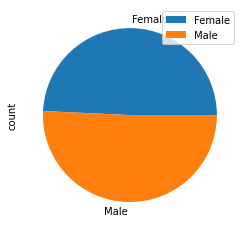

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = cleaned_df.groupby("Sex")["Mouse ID"].agg([('count',np.count_nonzero)])
gender_df.plot.pie(y='count')

In [81]:
gender_df

,count
Sex,
Female,930
Male,958


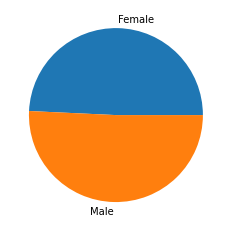

In [181]:
pie_labels = ['Female', 'Male']
pie_sizes = [930,958]
plt.pie(pie_sizes,labels=pie_labels)
plt.show()

In [109]:
# Quartiles, Outliers and Boxplots
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

# First of all make four datasets of each treatment: 


Capomulin_df = cleaned_df[cleaned_df["Drug Regimen"]=="Capomulin" ]
Capomulin_df = Capomulin_df[Capomulin_df["Timepoint"] == 45]
Capomulin_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
134,r554,Capomulin,Female,8,17,45,32.377357,3
144,m957,Capomulin,Female,3,19,45,33.329098,1
164,t565,Capomulin,Female,20,17,45,34.455298,0
204,i738,Capomulin,Female,23,20,45,37.311846,2
224,w914,Capomulin,Male,24,21,45,36.041047,2


In [117]:
# then calculate each IQR and quartiles: 
# there may be potential outliers because the data range is big compare with its IQR. 
# It could also because the drug has worked positively on decreasing tumor size
tumor_ca = Capomulin_df["Tumor Volume (mm3)"]
mean_ca = np.mean(tumor_ca)
sd_ca = np.std(tumor_ca)
iqr_ca = st.iqr(tumor_ca)

print(f"Roughly 68% of the tumor of Capomulin is between {round(mean_ca-sd_ca,3)} and {round(mean_ca+sd_ca,3)}")
print(f"Roughly 95% of the tumor of Capomulin is between {round(mean_ca-2*sd_ca,3)} and {round(mean_ca+2*sd_ca,3)}")
print(f"Roughly 99.7% of the tumor of Capomulin is between {round(mean_ca-3*sd_ca,3)} and {round(mean_ca+3*sd_ca,3)}")
print(f"IQR of the tumor of Capomulin is {round(iqr_ca,3)}")

Roughly 68% of the tumor of Capomulin is between 30.762 and 41.71
Roughly 95% of the tumor of Capomulin is between 25.289 and 47.184
Roughly 99.7% of the tumor of Capomulin is between 19.815 and 52.657
IQR of the tumor of Capomulin is 7.782


In [118]:
# there may be potential outliers because the data range is big compare with its IQR
# It could also because the drug has worked positively on decreasing tumor size

Ramicane_df = cleaned_df[cleaned_df["Drug Regimen"]=="Ramicane" ]
Ramicane_df = Ramicane_df[Ramicane_df["Timepoint"] == 45]

tumor_ra = Ramicane_df["Tumor Volume (mm3)"]
mean_ra = np.mean(tumor_ra)
sd_ra = np.std(tumor_ra)
iqr_ra = st.iqr(tumor_ra)

print(f"Roughly 68% of the tumor of Ramicane is between {round(mean_ra-sd_ra,3)} and {round(mean_ra+sd_ra,3)}")
print(f"Roughly 95% of the tumor of Ramicane is between {round(mean_ra-2*sd_ra,3)} and {round(mean_ra+2*sd_ra,3)}")
print(f"Roughly 99.7% of the tumor of Ramicane is between {round(mean_ra-3*sd_ra,3)} and {round(mean_ra+3*sd_ra,3)}")
print(f"IQR of the tumor of Ramicane is {round(iqr_ra,3)}")

Roughly 68% of the tumor of Ramicane is between 29.608 and 40.303
Roughly 95% of the tumor of Ramicane is between 24.261 and 45.651
Roughly 99.7% of the tumor of Ramicane is between 18.913 and 50.998
IQR of the tumor of Ramicane is 7.527


In [120]:
# data range is small compared with others. It could be this treatment is not working

Infubinol_df = cleaned_df[cleaned_df["Drug Regimen"]=="Infubinol" ]
Infubinol_df = Infubinol_df[Infubinol_df["Timepoint"] == 45]

tumor_in = Infubinol_df["Tumor Volume (mm3)"]
mean_in = np.mean(tumor_in)
sd_in = np.std(tumor_in)
iqr_in = st.iqr(tumor_in)

print(f"Roughly 68% of the tumor of Infubinol is between {round(mean_in-sd_in,3)} and {round(mean_in+sd_in,3)}")
print(f"Roughly 95% of the tumor of Infubinol is between {round(mean_in-2*sd_in,3)} and {round(mean_in+2*sd_in,3)}")
print(f"Roughly 99.7% of the tumor of Infubinol is between {round(mean_in-3*sd_in,3)} and {round(mean_in+3*sd_in,3)}")
print(f"IQR of the tumor of Infubinol is {round(iqr_in,3)}")

Roughly 68% of the tumor of Infubinol is between 62.519 and 68.992
Roughly 95% of the tumor of Infubinol is between 59.282 and 72.229
Roughly 99.7% of the tumor of Infubinol is between 56.045 and 75.466
IQR of the tumor of Infubinol is 4.931


In [121]:
# data range is small compared with others. It could be this treatment is not working

Ceftamin_df = cleaned_df[cleaned_df["Drug Regimen"]=="Ceftamin" ]
Ceftamin_df = Ceftamin_df[Ceftamin_df["Timepoint"] == 45]

tumor_ce = Ceftamin_df["Tumor Volume (mm3)"]
mean_ce = np.mean(tumor_ce)
sd_ce = np.std(tumor_ce)
iqr_ce = st.iqr(tumor_ce)

print(f"Roughly 68% of the tumor of Ceftamin is between {round(mean_ce-sd_ce,3)} and {round(mean_ce+sd_ce,3)}")
print(f"Roughly 95% of the tumor of Ceftamin is between {round(mean_ce-2*sd_ce,3)} and {round(mean_ce+2*sd_ce,3)}")
print(f"Roughly 99.7% of the tumor of Ceftamin is between {round(mean_ce-3*sd_ce,3)} and {round(mean_ce+3*sd_ce,3)}")
print(f"IQR of the tumor of Ceftamin is {round(iqr_ce,3)}")

Roughly 68% of the tumor of Ceftamin is between 61.007 and 67.258
Roughly 95% of the tumor of Ceftamin is between 57.881 and 70.384
Roughly 99.7% of the tumor of Ceftamin is between 54.755 and 73.51
IQR of the tumor of Ceftamin is 6.094


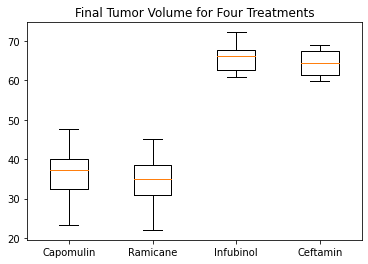

In [183]:
 # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin = Capomulin_df["Tumor Volume (mm3)"].tolist()
Ramicane = Ramicane_df["Tumor Volume (mm3)"].tolist()
Infubinol = Infubinol_df["Tumor Volume (mm3)"].tolist()
Ceftamin = Ceftamin_df["Tumor Volume (mm3)"].tolist()

box_tumor = {'Capomulin':Capomulin, 'Ramicane':Ramicane, 'Infubinol':Infubinol, 'Ceftamin':Ceftamin}
fig, ax = plt.subplots()
ax.boxplot(box_tumor.values())
ax.set_xticklabels(box_tumor.keys())
ax.set_title('Final Tumor Volume for Four Treatments')
plt.show()

In [135]:
# Line and Scatter Plots

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# in this case, a mouse was picked from the first mouse ID of the Capomulin table

# make the Capomulin table first: 
line_Capomulin = cleaned_df[cleaned_df["Drug Regimen"]=="Capomulin" ]
line_Capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


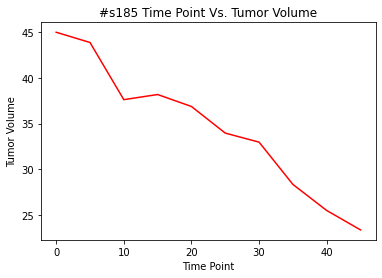

In [138]:
# from the table above, the mouse ID is 's185'

line_Capomulin = line_Capomulin[line_Capomulin["Mouse ID"]=="s185" ]
x = line_Capomulin["Timepoint"].tolist()
y = line_Capomulin["Tumor Volume (mm3)"].tolist()
plt.plot(x,y,color ="red", label = "Capomulin")
plt.title("#s185 Time Point Vs. Tumor Volume")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")
plt.show()

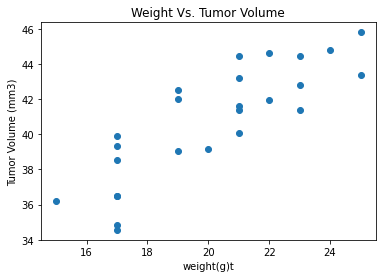

In [168]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

scatter_Capomulin = cleaned_df[cleaned_df["Drug Regimen"]=="Capomulin" ]
scatter_Capomulin = scatter_Capomulin.groupby("Mouse ID").agg({"Weight (g)":'mean',"Tumor Volume (mm3)":'mean'})
scatter_x = scatter_Capomulin["Weight (g)"]
scatter_y = scatter_Capomulin["Tumor Volume (mm3)"]
plt.scatter(scatter_x,scatter_y)
plt.title("Weight Vs. Tumor Volume")
plt.xlabel("weight(g)t")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [172]:
#  Correlation and Regression

(slope,intercept,rvalue,pvalue,stderr) = st.linregress(scatter_x,scatter_y)

regress_value = scatter_x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.95x +21.55


 The r-squared is: 0.7088568047708717


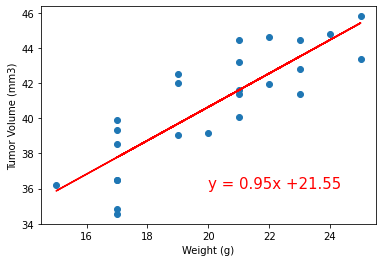

In [174]:
plt.scatter(scatter_x,scatter_y)
plt.plot(scatter_x,regress_value,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.annotate(line_eq,(20,36),fontsize = 15, color ="red")

print(f" The r-squared is: {rvalue**2}")

plt.show()